<a href="https://colab.research.google.com/github/ablet-imin/Max-LL/blob/main/chi2_scan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.04989611 0.10543379]
2.3060041350333704
c0: 3.679731119442086 [3.5646704855905673  3.7947917532936044]
c1: 3.1782716810756018 [2.935140918735213  3.4214024434159906]


<ErrorbarContainer object of 3 artists>

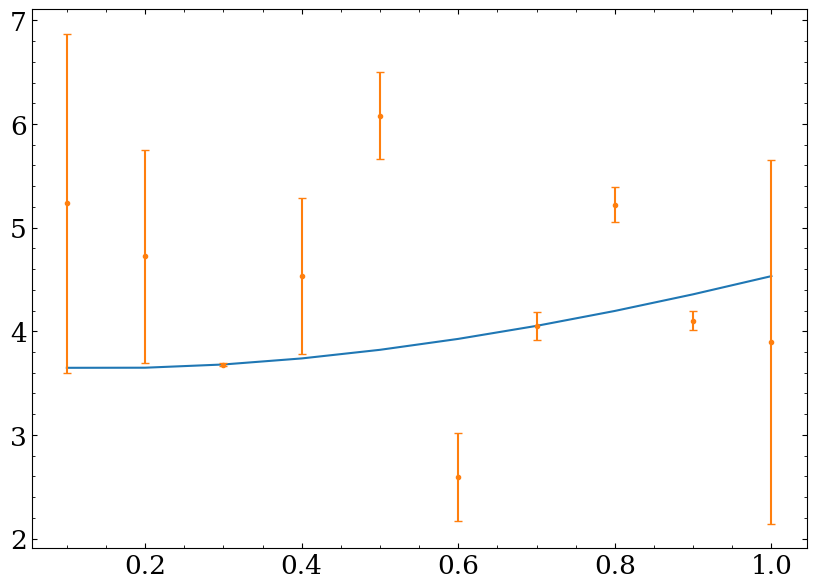

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats.distributions import  t
from scipy.stats import norm as Gaussian

import matplotlib.pyplot as plt
#Make plots prety
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10,7]
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams ['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['font.size'] = 19
matplotlib.rcParams['font.family']= 'DejaVu Serif'
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams['errorbar.capsize'] = 3
matplotlib.rcParams['figure.facecolor'] = (1,1,1)

# this is the function we want to fit to our data
def func(x,c0, c1):
    return c0 * np.exp(-x) + c1*x

x = np.array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])
y = func(x, 5.2861, 2.0294) + Gaussian.rvs(size=len(x))
y_err =  abs(Gaussian.rvs(size=len(x)))

#y = np.array([ 4.70192769,  4.46826356,  4.57021389,  4.29240134,  3.88155125,
#               3.78382253,  3.65454727,  3.86379487,  4.16428541,  4.06079909])

pars, pcov = curve_fit(func, x, y, p0=[4.96, 2.11],
                       sigma=y_err, absolute_sigma=True
)
print(np.diag(pcov)**0.5)
alpha = 0.05 # 95% confidence interval

n = len(y)    # number of data points
p = len(pars) # number of parameters

dof = max(0, n-p) # number of degrees of freedom
tval = t.ppf(1.0 - alpha / 2.0, dof) # student-t value for the dof and confidence level
print(tval)

for i, p,var in zip(range(n), pars, np.diag(pcov)):
    sigma = var**0.5
    print ('c{0}: {1} [{2}  {3}]'.format(i, p,
                                  p - sigma*tval,
                                  p + sigma*tval)
    )


plt.plot(x,func(x, pars[0], pars[1]))
plt.errorbar(x,y, yerr=y_err, fmt='.')


85.45792261873625


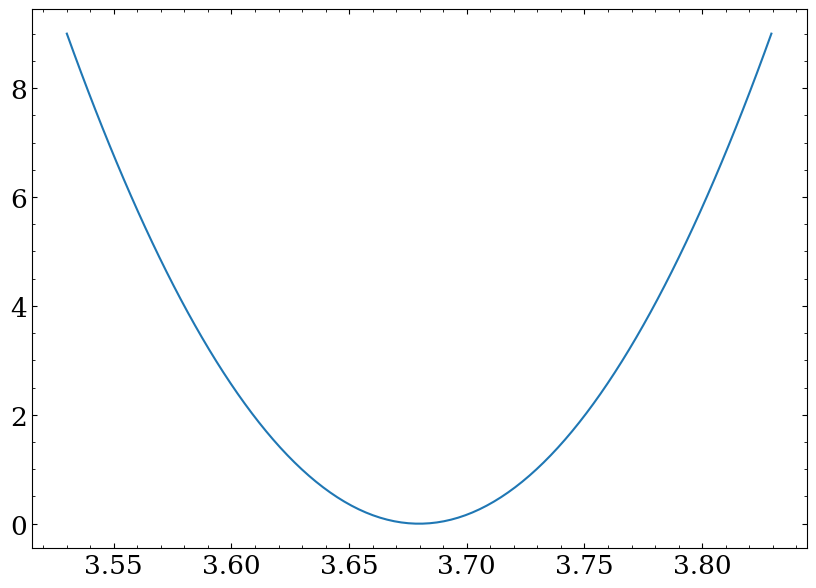

In [ ]:

chi2_0 = np.sum(((y - func(x,pars[0], pars[1]))**2) / (y_err**2))
print(chi2_0)

def delta_chi2(val):

    _pars, _pcov = curve_fit(lambda x, c: func(x,val, c), x, y, p0=2.11,
                       sigma=y_err, absolute_sigma=True
    )
    return np.sum(((y - func(x,val, _pars))**2) / (y_err**2)) - chi2_0

lower, upper = pars[0] - 3*(np.diag(pcov)[0]**0.5), pars[0] + 3*(np.diag(pcov)[0]**0.5)
chi2_list = [delta_chi2(i) for i in np.linspace(lower, upper, 100)]


plt.plot(np.linspace(lower, upper, 100), chi2_list)

In [ ]:
import scipy.optimize as opt
def confidence_interval(delta_chi2, zlevel, central, bound):
    ''' Finds 1sigma confidence interval for a delta chi2 of one parameter
        around a central value with a max distance of step.'''
    lo = opt.brentq(lambda x: delta_chi2(x)-zlevel,central-bound,central)
    hi = opt.brentq(lambda x: delta_chi2(x)-zlevel,central,central+bound)
    return lo,hi

central = pars[0]
lo,hi = confidence_interval(delta_chi2, 1, central, 2*(np.diag(pcov)[0]**0.5))
print('Number of A events = $%0.2f^{+%0.5f}_{-%0.5f}$'%(central,hi-central,central-lo))

Number of A events = $3.68^{+0.04990}_{-0.04990}$


In [ ]:
Z = tval #1.9679296690653618

central = pars[0]
lo,hi = confidence_interval(delta_chi2, Z**2, central, 3*(np.diag(pcov)[0]**0.5))
print('Number of A events = $%0.2f^{+%0.5f}_{-%0.5f}$'%(central,hi-central,central-lo))

Number of A events = $3.68^{+0.11506}_{-0.11506}$


In [ ]:
# intercals from scan chi2 and just scale Z*STD are indectical
tval*(np.diag(pcov)[0]**0.5)

0.11506063385151849